<a href="https://colab.research.google.com/github/renste/CSC302/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
data.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

<Figure size 1200x800 with 0 Axes>

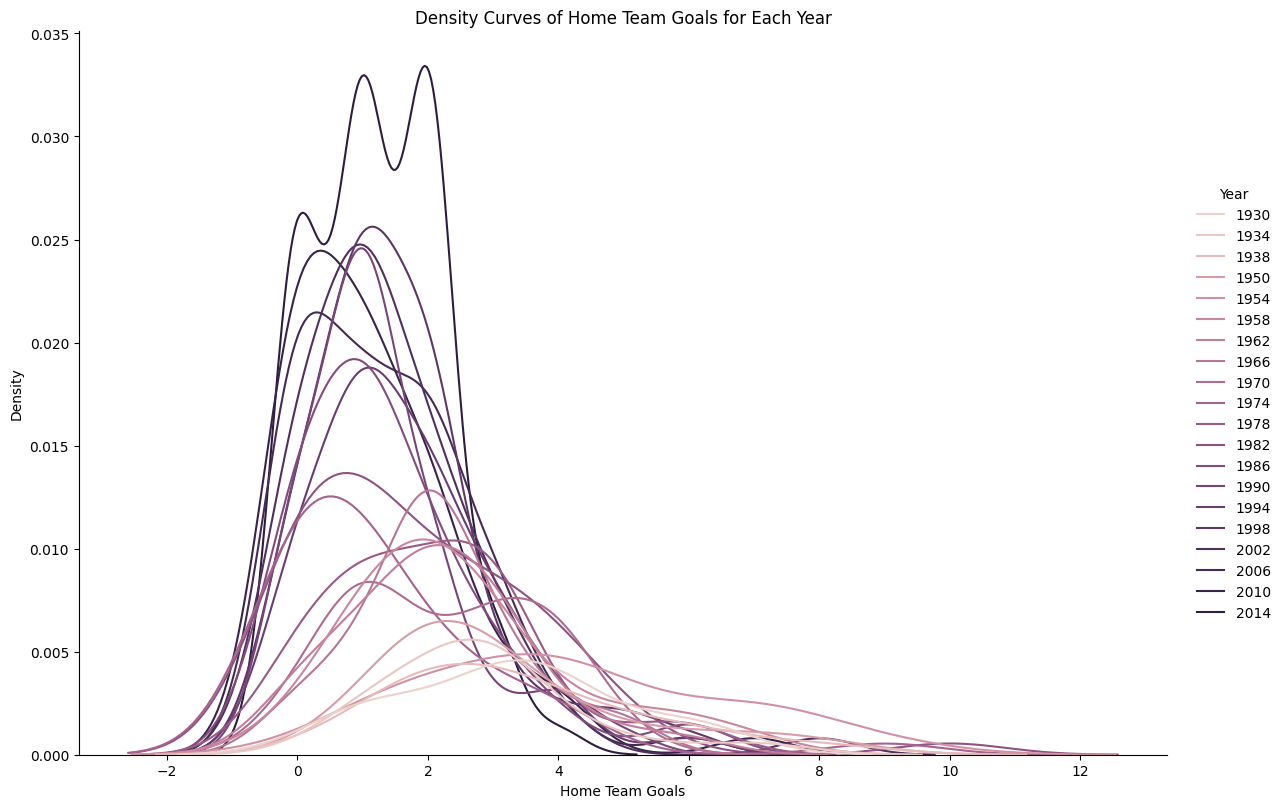

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.displot(data, x="Home Team Goals", hue="Year", kind="kde", height=8, aspect=1.5)
plt.title("Density Curves of Home Team Goals for Each Year")
plt.xlabel("Home Team Goals")
plt.ylabel("Density")
plt.show()

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

<ipython-input-10-7553ebfe66d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


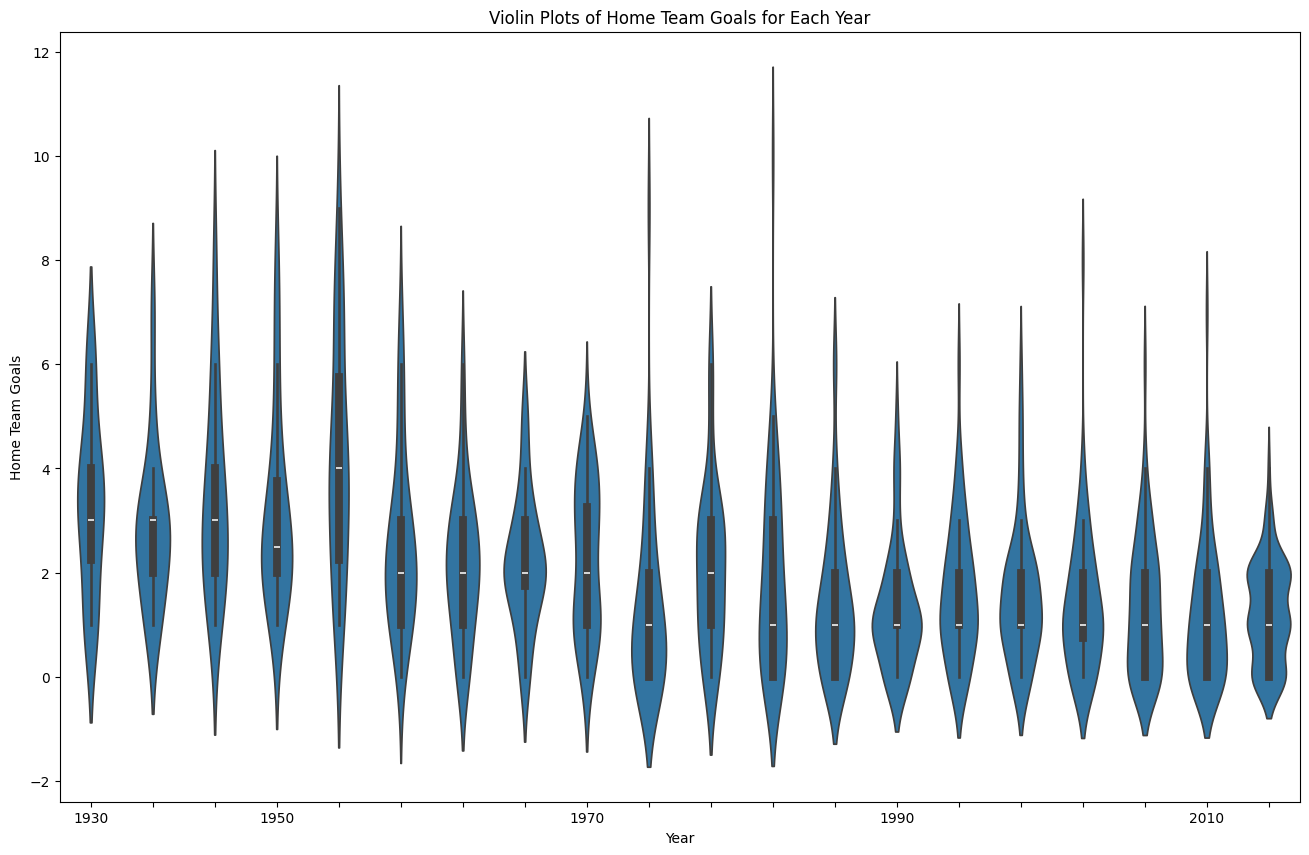

In [10]:
plt.figure(figsize=(16, 10))
ax = sns.violinplot(data=data, x="Year", y="Home Team Goals")
ax.set_title("Violin Plots of Home Team Goals for Each Year")
ax.set_xlabel("Year")
ax.set_ylabel("Home Team Goals")

labels = [label.get_text() if label.get_text().endswith('0') else '' for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.show()


**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [11]:
!pip install joypy

<Figure size 1400x1000 with 0 Axes>

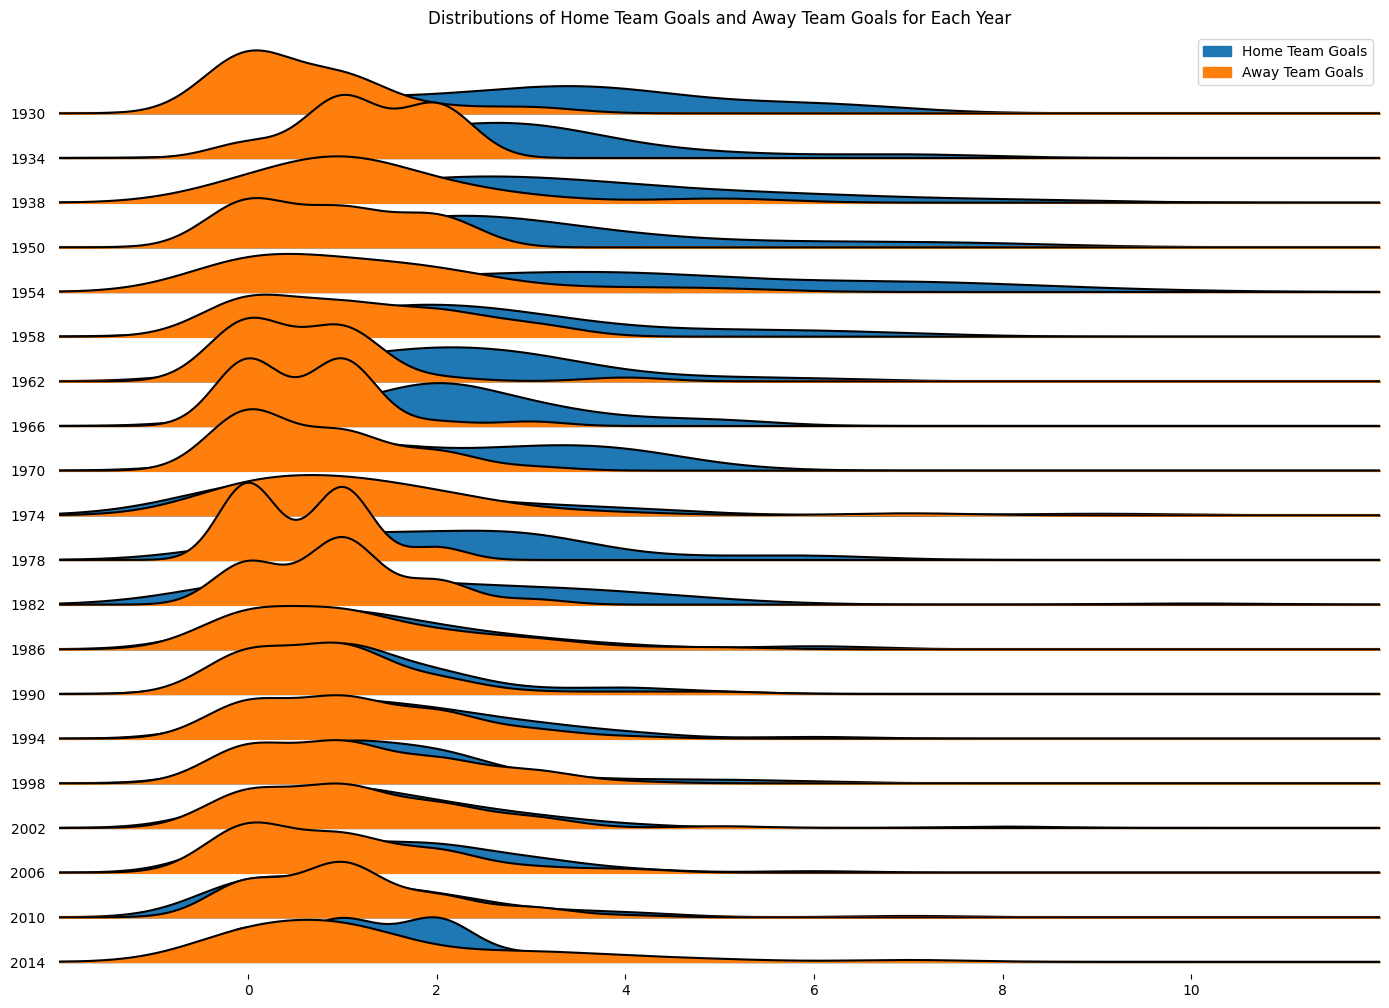

<ipython-input-12-ac83685a05bf>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Figure size 1400x1000 with 0 Axes>

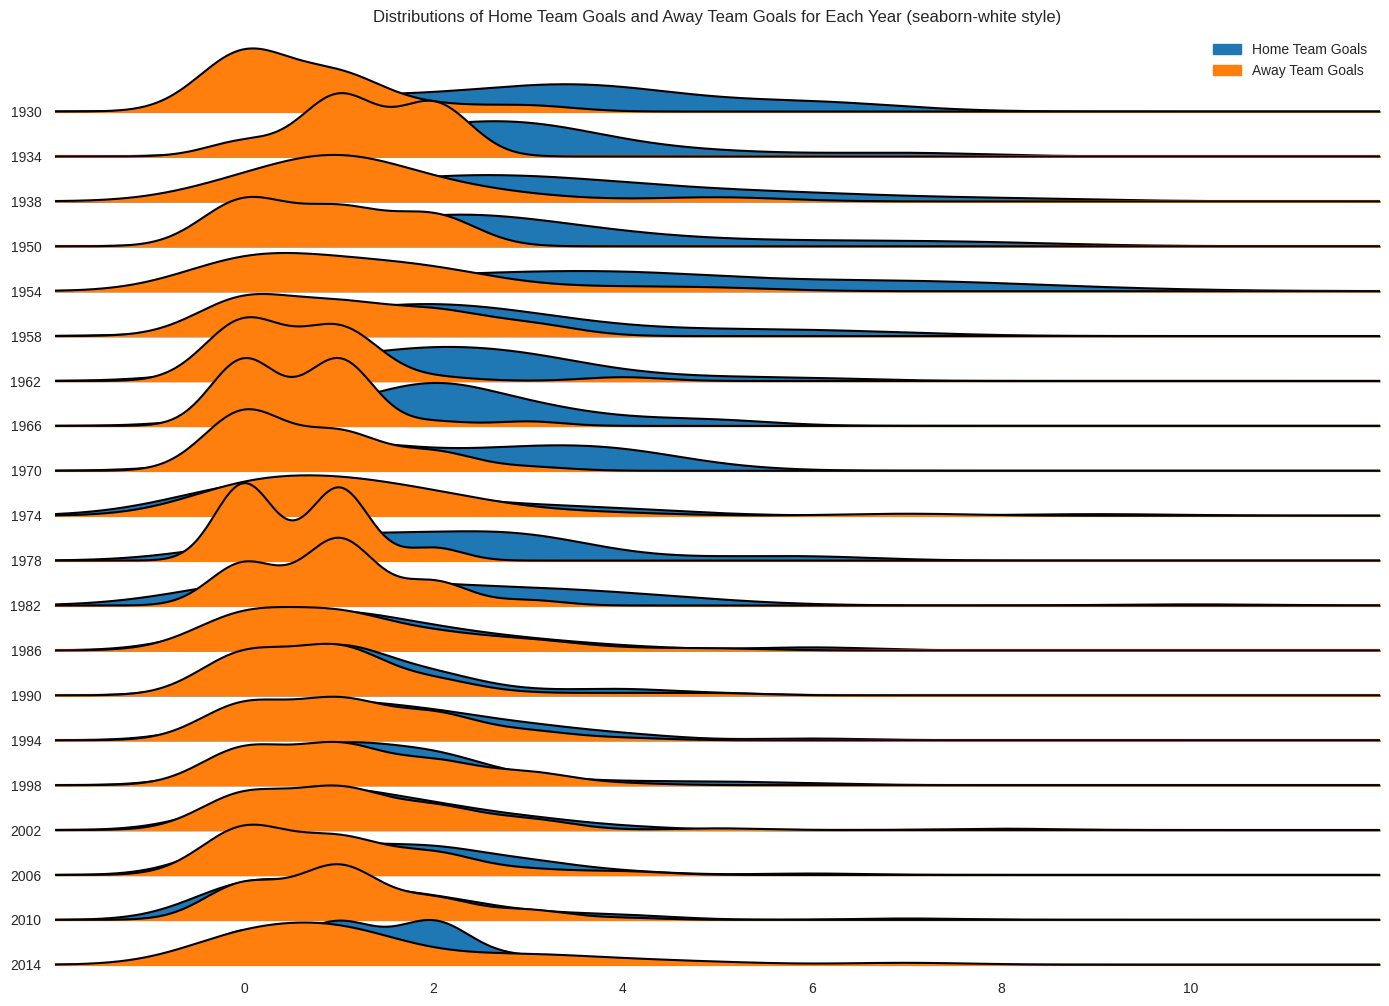

In [12]:
import joypy as jp

import matplotlib.pyplot as plt
from joypy import joyplot

plt.figure(figsize=(14, 10))
joyplot(
    data=data,
    by="Year",
    column=["Home Team Goals", "Away Team Goals"],
    figsize=(14, 10),
    legend=True
)
plt.title("Distributions of Home Team Goals and Away Team Goals for Each Year")
plt.show()

plt.style.use('seaborn-white')
plt.figure(figsize=(14, 10))
joyplot(
    data=data,
    by="Year",
    column=["Home Team Goals", "Away Team Goals"],
    figsize=(14, 10),
    legend=True
)
plt.title("Distributions of Home Team Goals and Away Team Goals for Each Year (seaborn-white style)")
plt.show()

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



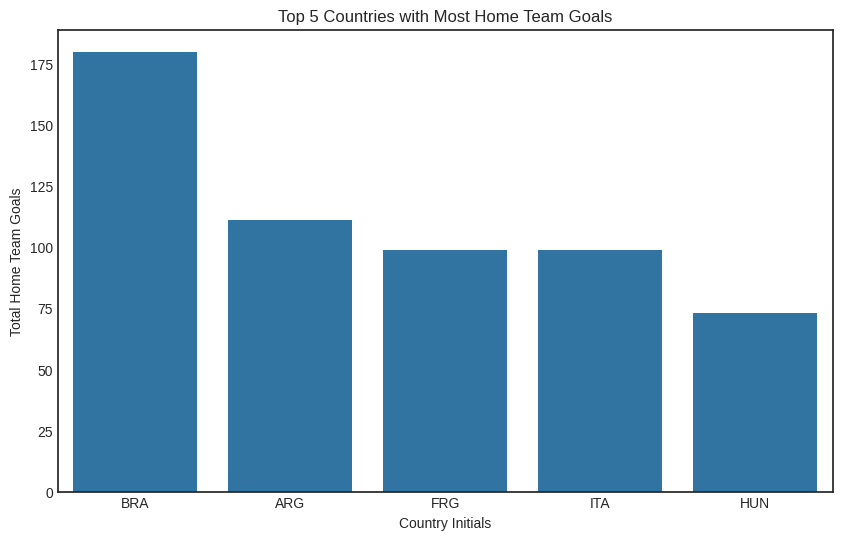

In [13]:
home_goals_sum = data.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

top_5_home_goals = home_goals_sum.sort_values(by='Home Team Goals', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_home_goals, x='Home Team Initials', y='Home Team Goals')
plt.title('Top 5 Countries with Most Home Team Goals')
plt.xlabel('Country Initials')
plt.ylabel('Total Home Team Goals')
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



<Figure size 1400x1000 with 0 Axes>

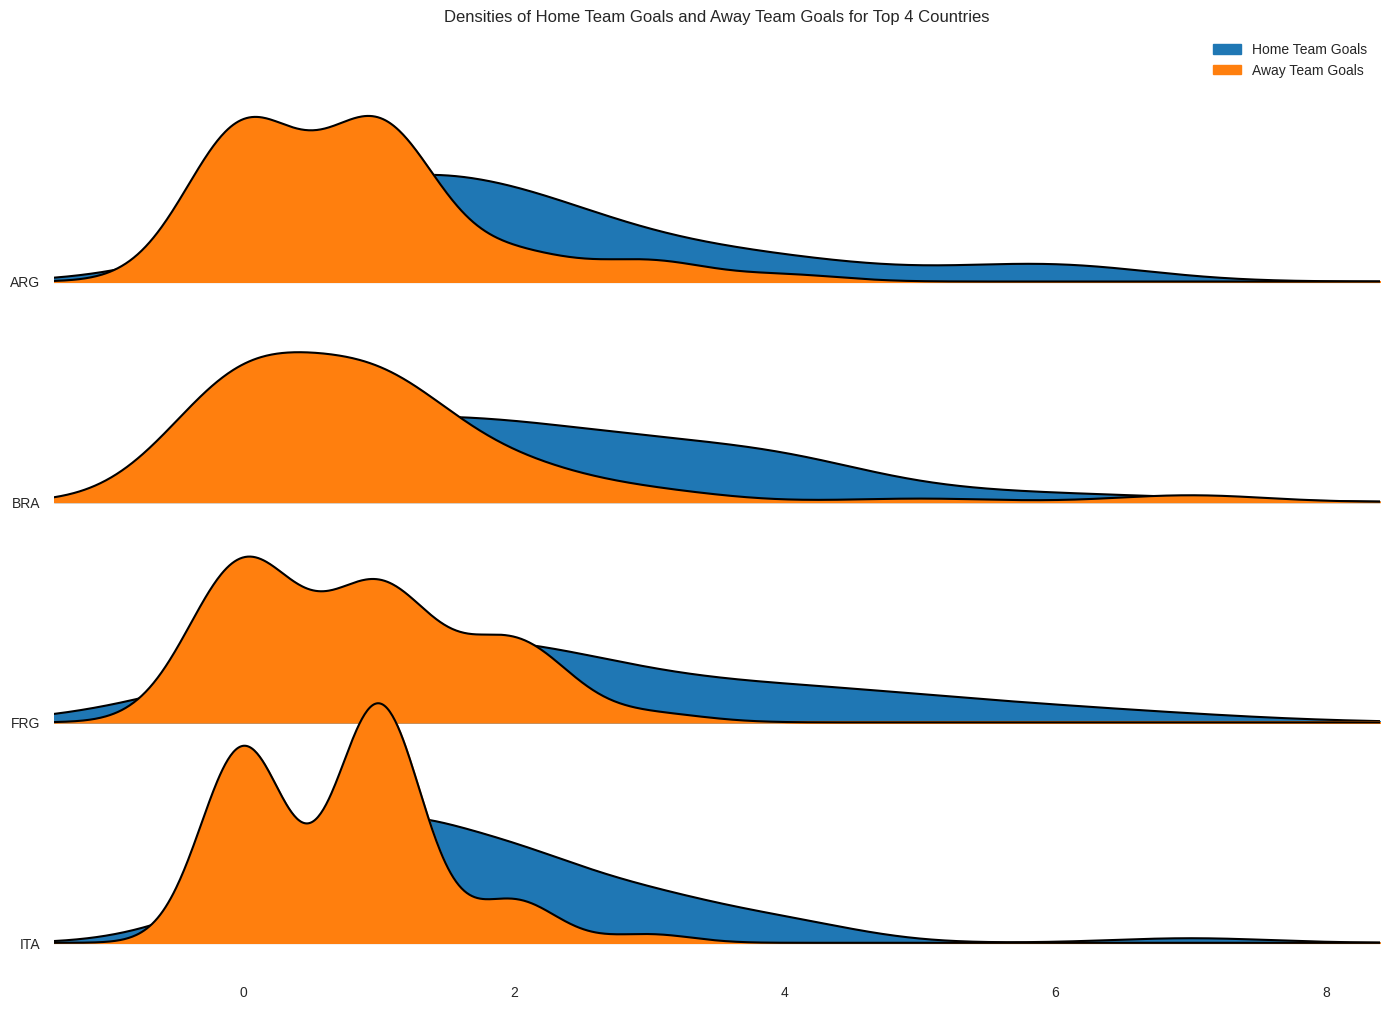

<Figure size 1400x1000 with 0 Axes>

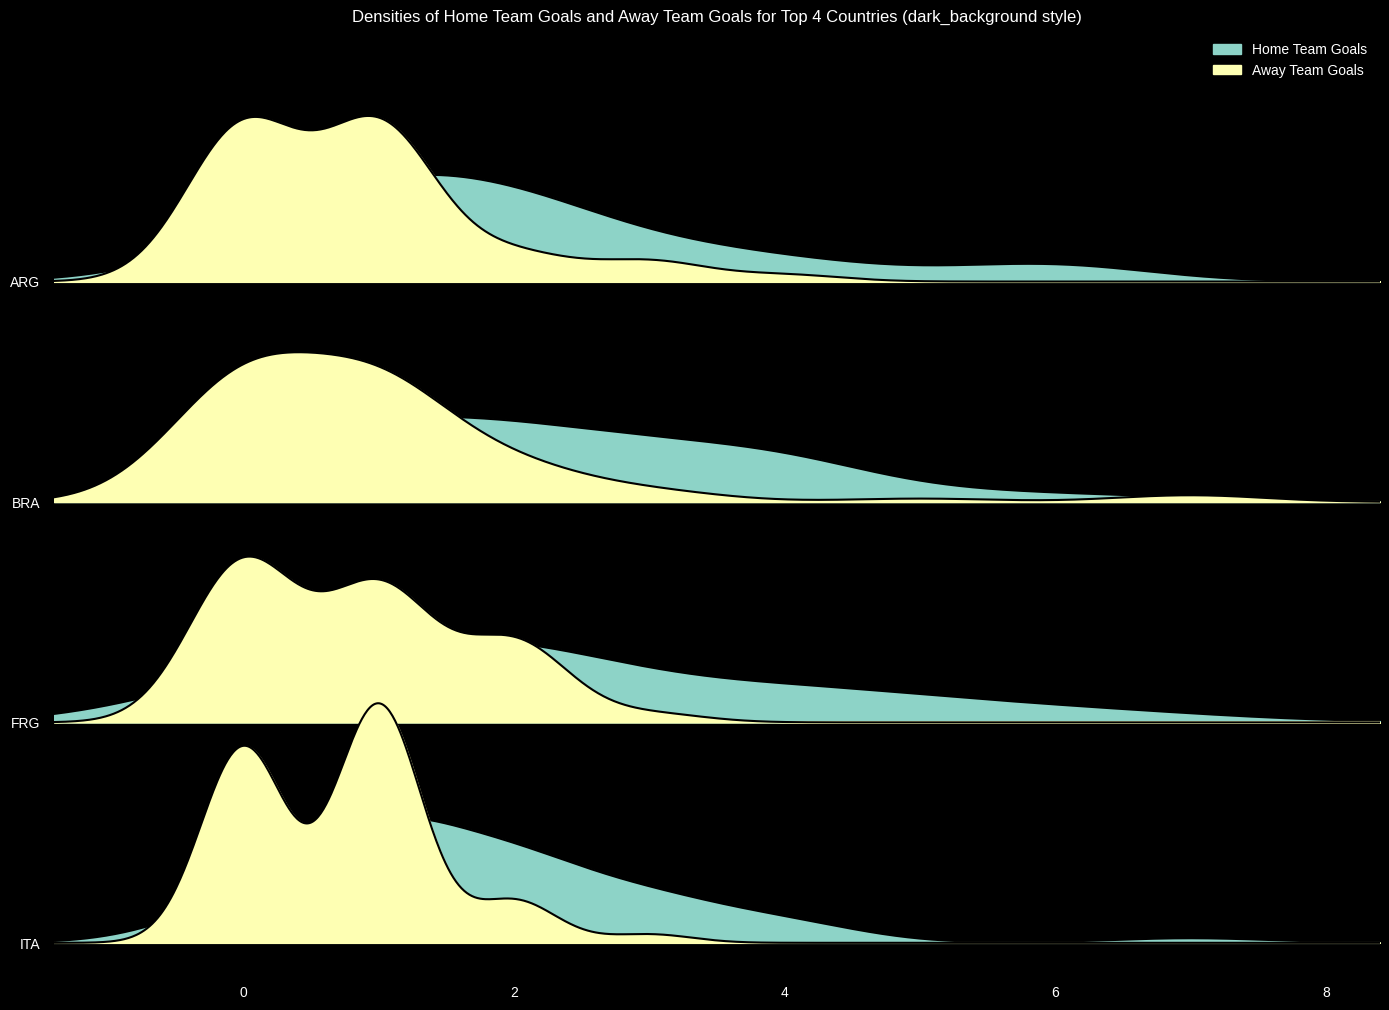

In [14]:
top_4_countries = top_5_home_goals['Home Team Initials'].head(4).values
top_4_data = data[data['Home Team Initials'].isin(top_4_countries)]

plt.figure(figsize=(14, 10))
joyplot(
    data=top_4_data,
    by='Home Team Initials',
    column=['Home Team Goals', 'Away Team Goals'],
    figsize=(14, 10),
    legend=True
)
plt.title("Densities of Home Team Goals and Away Team Goals for Top 4 Countries")
plt.show()

plt.style.use('dark_background')
plt.figure(figsize=(14, 10))
joyplot(
    data=top_4_data,
    by='Home Team Initials',
    column=['Home Team Goals', 'Away Team Goals'],
    figsize=(14, 10),
    legend=True
)
plt.title("Densities of Home Team Goals and Away Team Goals for Top 4 Countries (dark_background style)")
plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [15]:
!pip install seaborn_qqplot

<Figure size 1000x600 with 0 Axes>

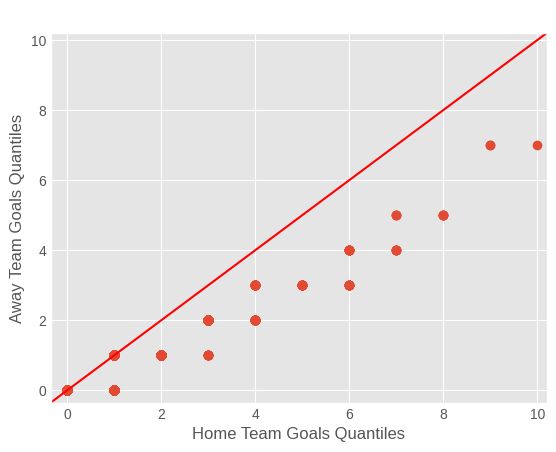

In [19]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.
import seaborn_qqplot as sqp
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sm.qqplot_2samples(data['Home Team Goals'], data['Away Team Goals'], line='45')
plt.title("QQ Plot: Home Team Goals vs. Away Team Goals")
plt.xlabel("Home Team Goals Quantiles")
plt.ylabel("Away Team Goals Quantiles")
plt.show()